In [66]:
import os
import sys

sys.path.append(os.path.abspath("src"))

from load_data import load_dataset

df = load_dataset("data/airline_delay_cause.csv")
df.head()


,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [68]:
df.shape


(318017, 21)

In [70]:
df.columns


Index(['year', 'month', 'carrier', 'carrier_name', 'airport', 'airport_name',
       'arr_flights', 'arr_del15', 'carrier_ct', 'weather_ct', 'nas_ct',
       'security_ct', 'late_aircraft_ct', 'arr_cancelled', 'arr_diverted',
       'arr_delay', 'carrier_delay', 'weather_delay', 'nas_delay',
       'security_delay', 'late_aircraft_delay'],
      dtype='object')

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318017 entries, 0 to 318016
Data columns (total 21 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   year                 318017 non-null  int64  
 1   month                318017 non-null  int64  
 2   carrier              318013 non-null  object 
 3   carrier_name         318013 non-null  object 
 4   airport              318014 non-null  object 
 5   airport_name         318017 non-null  object 
 6   arr_flights          317524 non-null  float64
 7   arr_del15            317285 non-null  float64
 8   carrier_ct           317525 non-null  float64
 9   weather_ct           317523 non-null  float64
 10  nas_ct               317529 non-null  float64
 11  security_ct          317529 non-null  float64
 12  late_aircraft_ct     317529 non-null  float64
 13  arr_cancelled        317529 non-null  float64
 14  arr_diverted         317527 non-null  float64
 15  arr_delay        

In [74]:
#Delay causes

delay_causes = [
    "carrier_delay",
    "weather_delay",
    "nas_delay",
    "security_delay",
    "late_aircraft_delay"
]

df[delay_causes].mean().sort_values(ascending=False)

late_aircraft_delay    1596.062993
carrier_delay          1286.577224
nas_delay              1099.516422
weather_delay           220.567542
security_delay            7.214845
dtype: float64

In [20]:
#delay in time (month/year)
#delay by year
df.groupby("year")[delay_causes].mean()


,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
year,,,,,
2003,978.229302,226.917894,1354.384036,9.149366,1146.723307
2004,1128.472227,301.843130,1466.376296,10.738750,1472.000659
2005,1260.679704,277.183935,1413.983124,8.293837,1538.139892
2006,1342.890821,268.732311,1417.933507,12.256173,1785.284908
2007,1479.449320,294.857480,1447.753400,9.081139,1950.574442
2008,1272.257803,245.144270,1384.588985,6.047826,1675.496879
2009,1048.918155,186.497591,1146.079805,4.467834,1355.226832
2010,1094.328626,158.602130,924.156825,6.116394,1418.954103
2011,1191.486995,164.293154,982.738890,5.224313,1616.989789


In [26]:
#delay by month
df.groupby("month")[delay_causes].mean()


,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
month,,,,,
1,1301.320344,259.285544,1069.891358,6.783832,1493.697968
2,1196.577125,239.788448,1037.248690,6.270487,1438.587795
3,1293.614984,177.354497,1068.148710,7.205523,1593.285461
4,1158.891185,170.789018,974.691910,6.746559,1419.381081
5,1224.783585,219.800549,1118.174634,5.420746,1568.208524
6,1557.861009,319.501237,1402.575338,8.689591,2150.463444
7,1667.583340,323.584145,1422.154056,8.030890,2252.752475
8,1471.023403,264.440390,1228.844174,10.295173,1863.979722
9,952.886966,135.459269,822.776597,5.693971,1032.275771


In [40]:
#compare by airport
airport_delay = df.groupby("airport")["arr_del15"].sum()
airport_delay.sort_values(ascending=False).head(10)


airport
ATL    1332668.0
ORD    1276665.0
DFW     923210.0
LAX     765651.0
DEN     749160.0
SFO     677788.0
EWR     670034.0
IAH     574012.0
LAS     545101.0
PHX     536098.0
Name: arr_del15, dtype: float64

In [56]:
#compare the companies
carrier_delay_rate = (
    df.groupby("carrier")[["arr_del15", "arr_flights"]]
    .sum()
    .assign(delay_rate=lambda x: x["arr_del15"] / x["arr_flights"])
    ["delay_rate"]
)

carrier_delay_rate.sort_values()


carrier
AQ    0.071180
HA    0.084199
QX    0.137359
9E    0.155125
YX    0.156392
DL    0.159171
AS    0.168454
OO    0.173260
WN    0.183797
HP    0.191473
US    0.192182
YV    0.193211
TZ    0.194519
UA    0.196089
FL    0.200311
AA    0.201149
NK    0.202377
OH    0.203777
VX    0.204534
DH    0.206596
MQ    0.211312
RU    0.217308
XE    0.218323
CO    0.219541
NW    0.220373
F9    0.221949
EV    0.224648
G4    0.226004
B6    0.236860
Name: delay_rate, dtype: float64

In [81]:
#delay rate by companies
carrier_delay_rate.sort_values(ascending=False).head(10)
#Top 10 most delay-prone airlines


carrier
B6    0.236860
G4    0.226004
EV    0.224648
F9    0.221949
NW    0.220373
CO    0.219541
XE    0.218323
RU    0.217308
MQ    0.211312
DH    0.206596
Name: delay_rate, dtype: float64

In [85]:
#These airports are the most delay-prone.
airport_delay_rate = (
    df.groupby("airport")[["arr_del15", "arr_flights"]]
    .sum()
    .assign(delay_rate=lambda x: x["arr_del15"] / x["arr_flights"])
    ["delay_rate"]
)

airport_delay_rate.sort_values(ascending=False).head(10)


airport
YNG    1.000000
SOP    0.419558
FOE    0.365256
CDB    0.343511
BIH    0.329502
ILG    0.324057
SLE    0.319318
MCN    0.316212
OTH    0.291507
EWR    0.280905
Name: delay_rate, dtype: float64

In [87]:
#Compare delay causes over time

delay_causes = [
    "carrier_delay",
    "weather_delay",
    "nas_delay",
    "security_delay",
    "late_aircraft_delay"
]

delay_by_year = (
    df.groupby("year")[delay_causes]
    .mean()
)

delay_by_year


,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
year,,,,,
2003,978.229302,226.917894,1354.384036,9.149366,1146.723307
2004,1128.472227,301.843130,1466.376296,10.738750,1472.000659
2005,1260.679704,277.183935,1413.983124,8.293837,1538.139892
2006,1342.890821,268.732311,1417.933507,12.256173,1785.284908
2007,1479.449320,294.857480,1447.753400,9.081139,1950.574442
2008,1272.257803,245.144270,1384.588985,6.047826,1675.496879
2009,1048.918155,186.497591,1146.079805,4.467834,1355.226832
2010,1094.328626,158.602130,924.156825,6.116394,1418.954103
2011,1191.486995,164.293154,982.738890,5.224313,1616.989789


In [89]:
#Focus on wether
delay_weather_vs_late = (
    df.groupby("year")[["weather_delay", "late_aircraft_delay"]]
    .mean()
)

delay_weather_vs_late


,weather_delay,late_aircraft_delay
year,,
2003,226.917894,1146.723307
2004,301.843130,1472.000659
2005,277.183935,1538.139892
2006,268.732311,1785.284908
2007,294.857480,1950.574442
2008,245.144270,1675.496879
2009,186.497591,1355.226832
2010,158.602130,1418.954103
2011,164.293154,1616.989789


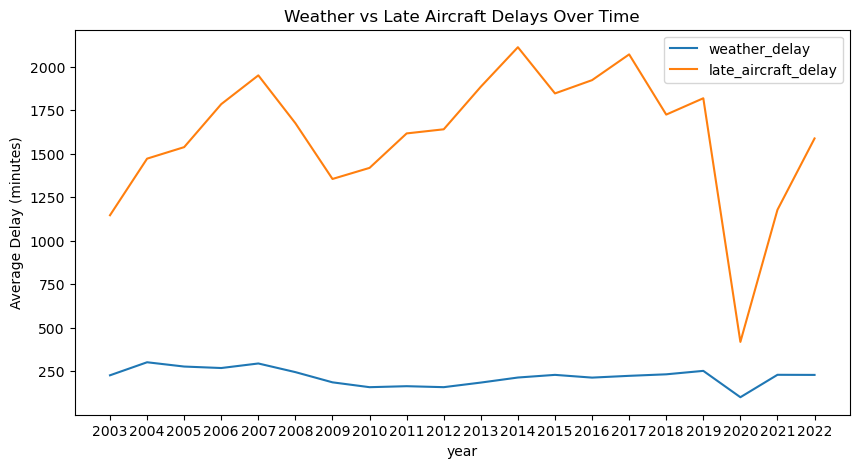

In [98]:
import matplotlib.pyplot as plt

ax = delay_weather_vs_late.plot(
    title="Weather vs Late Aircraft Delays Over Time",
    ylabel="Average Delay (minutes)",
    figsize=(10,5)
)

ax.set_xticks(delay_weather_vs_late.index)
ax.set_xticklabels(delay_weather_vs_late.index.astype(int))

plt.show()


<Axes: title={'center': 'Average Delay by Cause'}, xlabel='Average Delay (minutes)'>

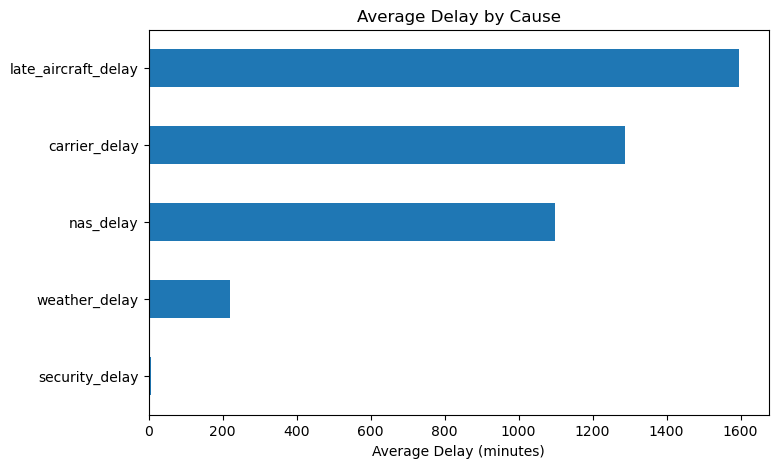

In [101]:
df[delay_causes].mean().sort_values().plot(
    kind="barh",
    title="Average Delay by Cause",
    xlabel="Average Delay (minutes)",
    figsize=(8,5)
)


<Axes: title={'center': 'Delay Causes by Month'}, xlabel='month', ylabel='Average Delay (minutes)'>

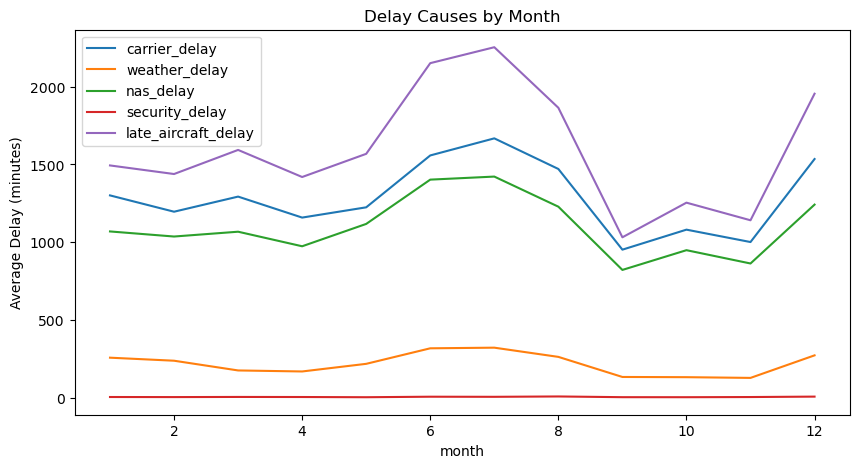

In [103]:
df.groupby("month")[delay_causes].mean().plot(
    title="Delay Causes by Month",
    ylabel="Average Delay (minutes)",
    figsize=(10,5)
)


<Axes: title={'center': 'Delay Rate – Top 10 Busiest Airports'}, xlabel='airport', ylabel='Delay Rate'>

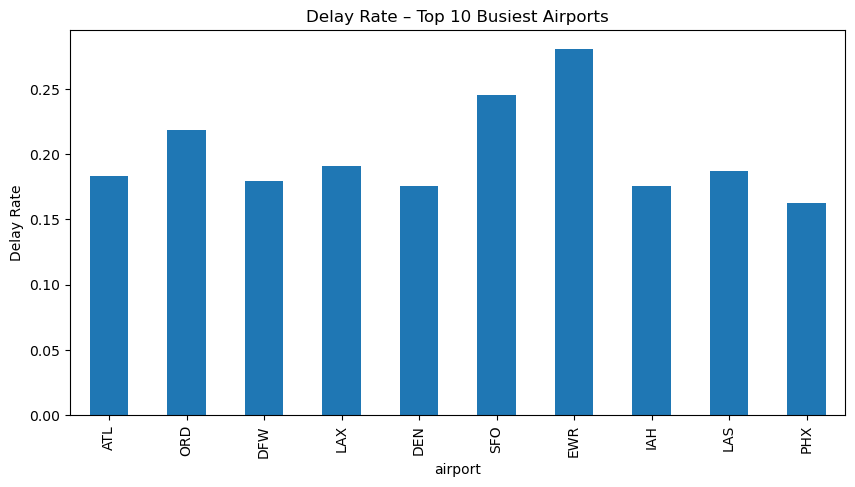

In [105]:
#graph on the airport with the top delay
airport_summary = (
    df.groupby("airport")[["arr_del15", "arr_flights"]]
    .sum()
)

airport_summary["delay_rate"] = (
    airport_summary["arr_del15"] / airport_summary["arr_flights"]
)

airport_summary.sort_values("arr_del15", ascending=False).head(10)["delay_rate"].plot(
    kind="bar",
    title="Delay Rate – Top 10 Busiest Airports",
    ylabel="Delay Rate",
    figsize=(10,5)
)


<Axes: title={'center': 'Distribution of Airline Delay Rates'}, xlabel='Delay Rate', ylabel='Frequency'>

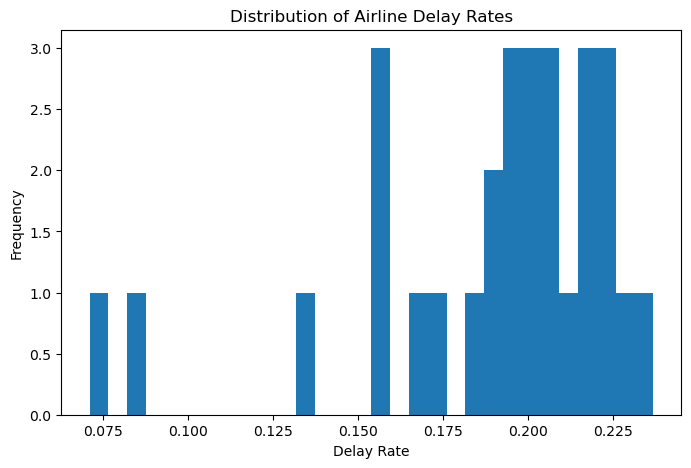

In [108]:
carrier_delay_rate.plot(
    kind="hist",
    bins=30,
    title="Distribution of Airline Delay Rates",
    xlabel="Delay Rate",
    figsize=(8,5)
)


In [44]:
#delay rate |(taux de retard)
df["delay_rate"] = df["arr_del15"] / df["arr_flights"]
#ex: 0.10 = 10 % des vols en retard

In [46]:
#retard moyen par vol retarder
df["avg_delay_per_delayed_flight"] = (
    df[delay_causes].sum(axis=1) / df["arr_del15"]
)


In [64]:
df["main_delay_cause"] = (
    df[delay_causes]
    .fillna(0)
    .idxmax(axis=1)
)

df.loc[df[delay_causes].fillna(0).sum(axis=1) == 0, "main_delay_cause"] = "no_delay"

#To identify the dominant delay cause, missing values were treated as zero delay minutes to ensure robustness.
#The main cause corresponds to the maximum delay duration per observation.

In [50]:
#score de fiabilité
df["reliability_score"] = 1 - df["delay_rate"]


In [52]:
#score de fiabilité en pourcent
df["reliability_score_100"] = df["reliability_score"] * 100


In [ ]:
#Idées de fonctionnalités d’app (basées sur TES variables)
#💡 Très réalistes pour ton projet
#🔍 Sélection d’un aéroport → afficher fiabilité
#✈️ Sélection d’une compagnie → score + causes
#📅 Choix d’un mois → risque de retard
#🟥 🟨 🟩 Code couleur (faible / moyen / élevé)